In [1]:
%matplotlib nbagg

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook")
sns.set_style("ticks")

In [3]:
import lal as lal
import lalsimulation as lalsim

In [4]:
H1=lalsim.DetectorPrefixToLALDetector('H1')
L1=lalsim.DetectorPrefixToLALDetector('L1')
seglen=8.
fs = 2048

In [5]:
approx = lalsim.IMRPhenomPv2

In [7]:
# loading posterior samples from https://trac.ligo.caltech.edu/cbc/browser/searches/O1/papers/BBH/parameter_estimation/C02_samples/GW150914/allIsp_post.dat
posterior = np.genfromtxt('/home/spxiwh/TMP/allIsp_post.dat',names=True)
sorted_posterior=posterior[np.argsort(posterior['logprior']+posterior['logl'])][::-1]

In [8]:
print len(sorted_posterior)

23424


In [9]:
phi0 = sorted_posterior[0]['phi_orb']
m1 = sorted_posterior[0]['m1']
m2 = sorted_posterior[0]['m2']
dist = sorted_posterior[0]['distance']
fmin = sorted_posterior[0]['flow']
fref = sorted_posterior[0]['f_ref']
fmax = 0.
fmax = fs/2.
theta_jn = sorted_posterior[0]['theta_jn']
phi_jl = sorted_posterior[0]['phi_jl']
tilt1 = sorted_posterior[0]['tilt1']
tilt2 = sorted_posterior[0]['tilt2']
phi12 = sorted_posterior[0]['phi12']
a1 = sorted_posterior[0]['a1']
a2 = sorted_posterior[0]['a2']
spins=lalsim.SimInspiralTransformPrecessingNewInitialConditions(theta_jn,phi_jl,tilt1,tilt2,phi12,a1,a2,m1,m2,fref)
inclination = sorted_posterior[0]['iota']
s1x = spins[1]
s1y = spins[2]
s1z = spins[3]
s2x = spins[4]
s2y = spins[5]
s2z = spins[6]
#chi = 0.
ampOrder = -1
phOrder = -1
deltaT = 1. / fs
deltaF = 1./seglen
m1_SI = m1 * lal.MSUN_SI
m2_SI = m2 * lal.MSUN_SI
distance = dist * 1.e6 * lal.PC_SI
time=sorted_posterior[0]['time']
ra=sorted_posterior[0]['ra']
dec=sorted_posterior[0]['dec']
psi=sorted_posterior[0]['psi']

In [10]:
hpt, hct = lalsim.SimInspiralChooseTDWaveform(phi0,deltaT,m1_SI,m2_SI, s1x, s1y, s1z, s2x, s2y,s2z, fmin, fref, distance, inclination, 0., 0., None  , None , ampOrder , phOrder , approx)
hpt.epoch = hct.epoch = time-seglen+2.
hpH1=lalsim.SimDetectorStrainREAL8TimeSeries(hpt, hct, ra, dec, psi, H1)
hpL1=lalsim.SimDetectorStrainREAL8TimeSeries(hpt, hct, ra, dec, psi, L1)

<IPython.core.display.Javascript object>


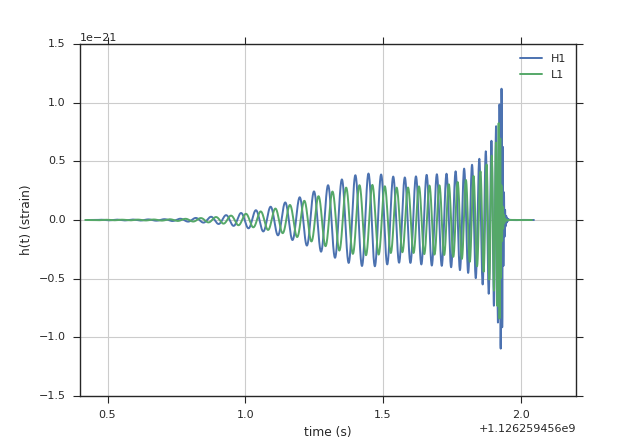

In [11]:
plt.plot(np.arange(hpH1.data.length, dtype=float) * hpH1.deltaT + hpH1.epoch, hpH1.data.data,label='H1')
plt.plot(np.arange(hpL1.data.length, dtype=float) * hpL1.deltaT + hpL1.epoch, hpL1.data.data,label='L1')
plt.xlabel('time (s)')
plt.ylabel('h(t) (strain)')
plt.grid()
plt.legend()